<a href="https://colab.research.google.com/github/ejwestbr/ejwestbr/blob/main/rt_movie_reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip list

Package                       Version
----------------------------- ---------------------
absl-py                       1.0.0
alabaster                     0.7.12
albumentations                0.1.12
altair                        4.2.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arviz                         0.12.0
astor                         0.8.1
astropy                       4.3.1
astunparse                    1.6.3
atari-py                      0.2.9
atomicwrites                  1.4.0
attrs                         21.4.0
audioread                     2.1.9
autograd                      1.4
Babel                         2.10.1
backcall                      0.2.0
beautifulsoup4                4.6.3
bleach                        5.0.0
blis                          0.4.1
bokeh                         2.3.3
Bottleneck                    1.3.4
branca                        0.5.0
bs4                           0.0.1
Cache

In [2]:
#pip install -U spacy

  Using cached spacy-3.3.0-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (6.2 MB)
  Attempting uninstall: spacy
    Found existing installation: spacy 3.0.8
    Uninstalling spacy-3.0.8:
      Successfully uninstalled spacy-3.0.8
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
en-core-web-sm 3.0.0 requires spacy<3.1.0,>=3.0.0, but you have spacy 3.3.0 which is incompatible.


In [3]:
import spacy

In [4]:
from nltk import *

In [5]:
!python -m spacy info

/usr/local/lib/python3.7/dist-packages/spacy/util.py:837: UserWarning: [W095] Model 'en_core_web_sm' (3.0.0) was trained with spaCy v3.0 and may not be 100% compatible with the current version (3.3.0). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)

============================== Info about spaCy ==============================

spaCy version    3.3.0                         
Location         /usr/local/lib/python3.7/dist-packages/spacy
Platform         Linux-5.4.188+-x86_64-with-Ubuntu-18.04-bionic
Python version   3.7.13                        
Pipelines        en_core_web_sm (3.0.0)        



In [6]:
import nltk
from nltk import FreqDist
import pandas as pd 
from bs4 import BeautifulSoup
import string 
from nltk.corpus import stopwords
from nltk.corpus import PlaintextCorpusReader
import re
from nltk.corpus import LazyCorpusLoader

In [7]:
import numpy as np
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import textblob
import matplotlib.pyplot as plt

In [8]:
from nltk.tokenize import TreebankWordTokenizer
from nltk.tokenize import word_tokenize
from nltk.tokenize import wordpunct_tokenize


In [9]:
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
plt.xticks(rotation=70)
pd.options.mode.chained_assignment = None
pd.set_option('display.max_colwidth', 100)
%matplotlib inline

In [10]:

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import DictVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer


In [11]:
nlp = spacy.load("en-core-web-sm")

ModuleNotFoundError: ignored

In [ ]:
!pip install en-core-web-sm

In [ ]:
#with open("rotten_tomatoes_critics.csv", "r", encoding='utf-8-sig') as f:
    rotten_tomatoes = f.read()
textdata <- read.csv("data/sotu.csv", header = TRUE, sep = ";", encoding = "UTF-8")

In [12]:
#cd "C:\\Users\\Elizabeth's\\Documents\\IST_736_SP22"

[Errno 2] No such file or directory: "C:\\Users\\Elizabeth's\\Documents\\IST_736_SP22"
/content


In [13]:
rt = pd.read_csv("rotten_tomatoes_critics.csv", header = 0,  encoding = "UTF-8")

In [14]:
rt

,rotten_tomatoes_link,critic_name,top_critic,publisher_name,review_type,review_score,review_content
0,m/0814255,Andrew L. Urban,False,Urban Cinefile,Fresh,NaN,A fantasy adventure that fuses Greek mythology to contemporary American places and values. Anyon...
1,m/0814255,Louise Keller,False,Urban Cinefile,Fresh,NaN,"Uma Thurman as Medusa, the gorgon with a coiffure of writhing snakes and stone-inducing hypnotic..."
2,m/0814255,NaN,False,FILMINK (Australia),Fresh,NaN,"With a top-notch cast and dazzling special effects, this will tide the teens over until the next..."
3,m/0814255,Ben McEachen,False,Sunday Mail (Australia),Fresh,3.5/5,"Whether audiences will get behind The Lightning Thief is hard to predict. Overall, it's an enter..."
4,m/0814255,Ethan Alter,True,Hollywood Reporter,Rotten,NaN,"What's really lacking in The Lightning Thief is a genuine sense of wonder, the same thing that b..."
...,...,...,...,...,...,...,...
4994,m/10008698-king_corn,Dorothy Woodend,False,The Tyee (British Columbia),Fresh,NaN,Although the film is very much in the Morgan Spurlock-school of highly personalized documentary ...
4995,m/10008698-king_corn,Annie Wagner,False,"The Stranger (Seattle, WA)",Fresh,NaN,"This smart, amiable documentary is about corn: how it's grown, subsidized, processed, and how it..."
4996,m/10008699-terrors_advocate,Dave White,False,Movies.com,Fresh,A,NaN
4997,m/10008699-terrors_advocate,Lisa Nesselson,True,Variety,Fresh,NaN,Sure to inspire debate in France and Germany and of obvious interest to anyone who follows the r...


In [15]:
rt.isna()

,rotten_tomatoes_link,critic_name,top_critic,publisher_name,review_type,review_score,review_content
0,False,False,False,False,False,True,False
1,False,False,False,False,False,True,False
2,False,True,False,False,False,True,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...
4994,False,False,False,False,False,True,False
4995,False,False,False,False,False,True,False
4996,False,False,False,False,False,False,True
4997,False,False,False,False,False,True,False


In [16]:
rt.dropna(subset=['review_content'], inplace=True)
rt.head()

,rotten_tomatoes_link,critic_name,top_critic,publisher_name,review_type,review_score,review_content
0,m/0814255,Andrew L. Urban,False,Urban Cinefile,Fresh,NaN,A fantasy adventure that fuses Greek mythology to contemporary American places and values. Anyon...
1,m/0814255,Louise Keller,False,Urban Cinefile,Fresh,NaN,"Uma Thurman as Medusa, the gorgon with a coiffure of writhing snakes and stone-inducing hypnotic..."
2,m/0814255,NaN,False,FILMINK (Australia),Fresh,NaN,"With a top-notch cast and dazzling special effects, this will tide the teens over until the next..."
3,m/0814255,Ben McEachen,False,Sunday Mail (Australia),Fresh,3.5/5,"Whether audiences will get behind The Lightning Thief is hard to predict. Overall, it's an enter..."
4,m/0814255,Ethan Alter,True,Hollywood Reporter,Rotten,NaN,"What's really lacking in The Lightning Thief is a genuine sense of wonder, the same thing that b..."


In [17]:
rt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4720 entries, 0 to 4998
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   rotten_tomatoes_link  4720 non-null   object
 1   critic_name           4644 non-null   object
 2   top_critic            4720 non-null   bool  
 3   publisher_name        4720 non-null   object
 4   review_type           4720 non-null   object
 5   review_score          3561 non-null   object
 6   review_content        4720 non-null   object
dtypes: bool(1), object(6)
memory usage: 262.7+ KB


In [18]:
vectorizer = CountVectorizer()
vectors = vectorizer.fit_transform(rt.review_content)

In [19]:
print(vectors)

  (0, 4153)	1
  (0, 310)	1
  (0, 11352)	1
  (0, 4653)	1
  (0, 4986)	1
  (0, 7424)	1
  (0, 11524)	2
  (0, 2389)	1
  (0, 493)	1
  (0, 8328)	1
  (0, 547)	1
  (0, 12121)	1
  (0, 619)	1
  (0, 722)	1
  (0, 17)	1
  (0, 4817)	1
  (0, 7803)	1
  (0, 11188)	1
  (0, 2510)	1
  (0, 7724)	1
  (0, 12699)	1
  (0, 12523)	1
  (0, 11429)	1
  (0, 11354)	1
  (0, 12254)	1
  :	:
  (4719, 812)	1
  (4719, 10425)	1
  (4719, 7836)	1
  (4719, 6661)	1
  (4719, 12490)	1
  (4719, 6443)	1
  (4719, 7733)	1
  (4719, 8400)	1
  (4719, 1178)	1
  (4719, 1109)	1
  (4719, 8425)	1
  (4719, 12332)	1
  (4719, 7273)	1
  (4719, 3266)	1
  (4719, 1920)	1
  (4719, 2419)	1
  (4719, 9765)	1
  (4719, 12169)	1
  (4719, 6426)	1
  (4719, 2837)	1
  (4719, 11333)	1
  (4719, 2606)	1
  (4719, 3273)	1
  (4719, 5577)	1
  (4719, 504)	1


In [20]:
analyze = vectorizer.build_analyzer()

In [21]:
vec = DictVectorizer()

In [22]:
#vec.fit_transform(rt.review_content).toarray()




AttributeError: ignored

In [ ]:
vec.get_feature_names_out()

# Tokenization

with code help from https://towardsdatascience.com/preprocessing-text-data-using-python-576206753c28 from tokenization to lemmatization

In [ ]:
nltk.download('punkt')

In [ ]:
from nltk.tokenize import WhitespaceTokenizer


In [ ]:
pip install https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.0.0/en_core_web_sm-3.0.0.tar.gz

In [24]:
rt['tokenized'] = rt['review_content'].apply(wordpunct_tokenize)
rt.head()

,rotten_tomatoes_link,critic_name,top_critic,publisher_name,review_type,review_score,review_content,tokenized
0,m/0814255,Andrew L. Urban,False,Urban Cinefile,Fresh,NaN,A fantasy adventure that fuses Greek mythology to contemporary American places and values. Anyon...,"[A, fantasy, adventure, that, fuses, Greek, mythology, to, contemporary, American, places, and, ..."
1,m/0814255,Louise Keller,False,Urban Cinefile,Fresh,NaN,"Uma Thurman as Medusa, the gorgon with a coiffure of writhing snakes and stone-inducing hypnotic...","[Uma, Thurman, as, Medusa, ,, the, gorgon, with, a, coiffure, of, writhing, snakes, and, stone, ..."
2,m/0814255,NaN,False,FILMINK (Australia),Fresh,NaN,"With a top-notch cast and dazzling special effects, this will tide the teens over until the next...","[With, a, top, -, notch, cast, and, dazzling, special, effects, ,, this, will, tide, the, teens,..."
3,m/0814255,Ben McEachen,False,Sunday Mail (Australia),Fresh,3.5/5,"Whether audiences will get behind The Lightning Thief is hard to predict. Overall, it's an enter...","[Whether, audiences, will, get, behind, The, Lightning, Thief, is, hard, to, predict, ., Overall..."
4,m/0814255,Ethan Alter,True,Hollywood Reporter,Rotten,NaN,"What's really lacking in The Lightning Thief is a genuine sense of wonder, the same thing that b...","[What, ', s, really, lacking, in, The, Lightning, Thief, is, a, genuine, sense, of, wonder, ,, t..."


In [25]:
rt['lower'] = rt['tokenized'].apply(lambda x: [word.lower() for word in x])
rt.head()

,rotten_tomatoes_link,critic_name,top_critic,publisher_name,review_type,review_score,review_content,tokenized,lower
0,m/0814255,Andrew L. Urban,False,Urban Cinefile,Fresh,NaN,A fantasy adventure that fuses Greek mythology to contemporary American places and values. Anyon...,"[A, fantasy, adventure, that, fuses, Greek, mythology, to, contemporary, American, places, and, ...","[a, fantasy, adventure, that, fuses, greek, mythology, to, contemporary, american, places, and, ..."
1,m/0814255,Louise Keller,False,Urban Cinefile,Fresh,NaN,"Uma Thurman as Medusa, the gorgon with a coiffure of writhing snakes and stone-inducing hypnotic...","[Uma, Thurman, as, Medusa, ,, the, gorgon, with, a, coiffure, of, writhing, snakes, and, stone, ...","[uma, thurman, as, medusa, ,, the, gorgon, with, a, coiffure, of, writhing, snakes, and, stone, ..."
2,m/0814255,NaN,False,FILMINK (Australia),Fresh,NaN,"With a top-notch cast and dazzling special effects, this will tide the teens over until the next...","[With, a, top, -, notch, cast, and, dazzling, special, effects, ,, this, will, tide, the, teens,...","[with, a, top, -, notch, cast, and, dazzling, special, effects, ,, this, will, tide, the, teens,..."
3,m/0814255,Ben McEachen,False,Sunday Mail (Australia),Fresh,3.5/5,"Whether audiences will get behind The Lightning Thief is hard to predict. Overall, it's an enter...","[Whether, audiences, will, get, behind, The, Lightning, Thief, is, hard, to, predict, ., Overall...","[whether, audiences, will, get, behind, the, lightning, thief, is, hard, to, predict, ., overall..."
4,m/0814255,Ethan Alter,True,Hollywood Reporter,Rotten,NaN,"What's really lacking in The Lightning Thief is a genuine sense of wonder, the same thing that b...","[What, ', s, really, lacking, in, The, Lightning, Thief, is, a, genuine, sense, of, wonder, ,, t...","[what, ', s, really, lacking, in, the, lightning, thief, is, a, genuine, sense, of, wonder, ,, t..."


In [26]:
punc = string.punctuation
rt['no_punc'] = rt['lower'].apply(lambda x: [word for word in x if word not in punc])
rt.head()

,rotten_tomatoes_link,critic_name,top_critic,publisher_name,review_type,review_score,review_content,tokenized,lower,no_punc
0,m/0814255,Andrew L. Urban,False,Urban Cinefile,Fresh,NaN,A fantasy adventure that fuses Greek mythology to contemporary American places and values. Anyon...,"[A, fantasy, adventure, that, fuses, Greek, mythology, to, contemporary, American, places, and, ...","[a, fantasy, adventure, that, fuses, greek, mythology, to, contemporary, american, places, and, ...","[a, fantasy, adventure, that, fuses, greek, mythology, to, contemporary, american, places, and, ..."
1,m/0814255,Louise Keller,False,Urban Cinefile,Fresh,NaN,"Uma Thurman as Medusa, the gorgon with a coiffure of writhing snakes and stone-inducing hypnotic...","[Uma, Thurman, as, Medusa, ,, the, gorgon, with, a, coiffure, of, writhing, snakes, and, stone, ...","[uma, thurman, as, medusa, ,, the, gorgon, with, a, coiffure, of, writhing, snakes, and, stone, ...","[uma, thurman, as, medusa, the, gorgon, with, a, coiffure, of, writhing, snakes, and, stone, ind..."
2,m/0814255,NaN,False,FILMINK (Australia),Fresh,NaN,"With a top-notch cast and dazzling special effects, this will tide the teens over until the next...","[With, a, top, -, notch, cast, and, dazzling, special, effects, ,, this, will, tide, the, teens,...","[with, a, top, -, notch, cast, and, dazzling, special, effects, ,, this, will, tide, the, teens,...","[with, a, top, notch, cast, and, dazzling, special, effects, this, will, tide, the, teens, over,..."
3,m/0814255,Ben McEachen,False,Sunday Mail (Australia),Fresh,3.5/5,"Whether audiences will get behind The Lightning Thief is hard to predict. Overall, it's an enter...","[Whether, audiences, will, get, behind, The, Lightning, Thief, is, hard, to, predict, ., Overall...","[whether, audiences, will, get, behind, the, lightning, thief, is, hard, to, predict, ., overall...","[whether, audiences, will, get, behind, the, lightning, thief, is, hard, to, predict, overall, i..."
4,m/0814255,Ethan Alter,True,Hollywood Reporter,Rotten,NaN,"What's really lacking in The Lightning Thief is a genuine sense of wonder, the same thing that b...","[What, ', s, really, lacking, in, The, Lightning, Thief, is, a, genuine, sense, of, wonder, ,, t...","[what, ', s, really, lacking, in, the, lightning, thief, is, a, genuine, sense, of, wonder, ,, t...","[what, s, really, lacking, in, the, lightning, thief, is, a, genuine, sense, of, wonder, the, sa..."


In [27]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [28]:
stop_words = set(stopwords.words('english'))
rt['stopwords_removed'] = rt['no_punc'].apply(lambda x: [word for word in x if word not in stop_words])
rt.head()

,rotten_tomatoes_link,critic_name,top_critic,publisher_name,review_type,review_score,review_content,tokenized,lower,no_punc,stopwords_removed
0,m/0814255,Andrew L. Urban,False,Urban Cinefile,Fresh,NaN,A fantasy adventure that fuses Greek mythology to contemporary American places and values. Anyon...,"[A, fantasy, adventure, that, fuses, Greek, mythology, to, contemporary, American, places, and, ...","[a, fantasy, adventure, that, fuses, greek, mythology, to, contemporary, american, places, and, ...","[a, fantasy, adventure, that, fuses, greek, mythology, to, contemporary, american, places, and, ...","[fantasy, adventure, fuses, greek, mythology, contemporary, american, places, values, anyone, ar..."
1,m/0814255,Louise Keller,False,Urban Cinefile,Fresh,NaN,"Uma Thurman as Medusa, the gorgon with a coiffure of writhing snakes and stone-inducing hypnotic...","[Uma, Thurman, as, Medusa, ,, the, gorgon, with, a, coiffure, of, writhing, snakes, and, stone, ...","[uma, thurman, as, medusa, ,, the, gorgon, with, a, coiffure, of, writhing, snakes, and, stone, ...","[uma, thurman, as, medusa, the, gorgon, with, a, coiffure, of, writhing, snakes, and, stone, ind...","[uma, thurman, medusa, gorgon, coiffure, writhing, snakes, stone, inducing, hypnotic, gaze, one,..."
2,m/0814255,NaN,False,FILMINK (Australia),Fresh,NaN,"With a top-notch cast and dazzling special effects, this will tide the teens over until the next...","[With, a, top, -, notch, cast, and, dazzling, special, effects, ,, this, will, tide, the, teens,...","[with, a, top, -, notch, cast, and, dazzling, special, effects, ,, this, will, tide, the, teens,...","[with, a, top, notch, cast, and, dazzling, special, effects, this, will, tide, the, teens, over,...","[top, notch, cast, dazzling, special, effects, tide, teens, next, harry, potter, instalment]"
3,m/0814255,Ben McEachen,False,Sunday Mail (Australia),Fresh,3.5/5,"Whether audiences will get behind The Lightning Thief is hard to predict. Overall, it's an enter...","[Whether, audiences, will, get, behind, The, Lightning, Thief, is, hard, to, predict, ., Overall...","[whether, audiences, will, get, behind, the, lightning, thief, is, hard, to, predict, ., overall...","[whether, audiences, will, get, behind, the, lightning, thief, is, hard, to, predict, overall, i...","[whether, audiences, get, behind, lightning, thief, hard, predict, overall, entertaining, introd..."
4,m/0814255,Ethan Alter,True,Hollywood Reporter,Rotten,NaN,"What's really lacking in The Lightning Thief is a genuine sense of wonder, the same thing that b...","[What, ', s, really, lacking, in, The, Lightning, Thief, is, a, genuine, sense, of, wonder, ,, t...","[what, ', s, really, lacking, in, the, lightning, thief, is, a, genuine, sense, of, wonder, ,, t...","[what, s, really, lacking, in, the, lightning, thief, is, a, genuine, sense, of, wonder, the, sa...","[really, lacking, lightning, thief, genuine, sense, wonder, thing, brings, viewers, back, hogwarts]"


In [29]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [30]:
rt['pos_tags'] = rt['stopwords_removed'].apply(nltk.tag.pos_tag)
rt.head()

,rotten_tomatoes_link,critic_name,top_critic,publisher_name,review_type,review_score,review_content,tokenized,lower,no_punc,stopwords_removed,pos_tags
0,m/0814255,Andrew L. Urban,False,Urban Cinefile,Fresh,NaN,A fantasy adventure that fuses Greek mythology to contemporary American places and values. Anyon...,"[A, fantasy, adventure, that, fuses, Greek, mythology, to, contemporary, American, places, and, ...","[a, fantasy, adventure, that, fuses, greek, mythology, to, contemporary, american, places, and, ...","[a, fantasy, adventure, that, fuses, greek, mythology, to, contemporary, american, places, and, ...","[fantasy, adventure, fuses, greek, mythology, contemporary, american, places, values, anyone, ar...","[(fantasy, JJ), (adventure, NN), (fuses, VBZ), (greek, JJ), (mythology, NN), (contemporary, JJ),..."
1,m/0814255,Louise Keller,False,Urban Cinefile,Fresh,NaN,"Uma Thurman as Medusa, the gorgon with a coiffure of writhing snakes and stone-inducing hypnotic...","[Uma, Thurman, as, Medusa, ,, the, gorgon, with, a, coiffure, of, writhing, snakes, and, stone, ...","[uma, thurman, as, medusa, ,, the, gorgon, with, a, coiffure, of, writhing, snakes, and, stone, ...","[uma, thurman, as, medusa, the, gorgon, with, a, coiffure, of, writhing, snakes, and, stone, ind...","[uma, thurman, medusa, gorgon, coiffure, writhing, snakes, stone, inducing, hypnotic, gaze, one,...","[(uma, JJ), (thurman, NN), (medusa, NN), (gorgon, NN), (coiffure, NN), (writhing, VBG), (snakes,..."
2,m/0814255,NaN,False,FILMINK (Australia),Fresh,NaN,"With a top-notch cast and dazzling special effects, this will tide the teens over until the next...","[With, a, top, -, notch, cast, and, dazzling, special, effects, ,, this, will, tide, the, teens,...","[with, a, top, -, notch, cast, and, dazzling, special, effects, ,, this, will, tide, the, teens,...","[with, a, top, notch, cast, and, dazzling, special, effects, this, will, tide, the, teens, over,...","[top, notch, cast, dazzling, special, effects, tide, teens, next, harry, potter, instalment]","[(top, JJ), (notch, NN), (cast, NN), (dazzling, VBG), (special, JJ), (effects, NNS), (tide, IN),..."
3,m/0814255,Ben McEachen,False,Sunday Mail (Australia),Fresh,3.5/5,"Whether audiences will get behind The Lightning Thief is hard to predict. Overall, it's an enter...","[Whether, audiences, will, get, behind, The, Lightning, Thief, is, hard, to, predict, ., Overall...","[whether, audiences, will, get, behind, the, lightning, thief, is, hard, to, predict, ., overall...","[whether, audiences, will, get, behind, the, lightning, thief, is, hard, to, predict, overall, i...","[whether, audiences, get, behind, lightning, thief, hard, predict, overall, entertaining, introd...","[(whether, IN), (audiences, NNS), (get, VBP), (behind, IN), (lightning, VBG), (thief, JJ), (hard..."
4,m/0814255,Ethan Alter,True,Hollywood Reporter,Rotten,NaN,"What's really lacking in The Lightning Thief is a genuine sense of wonder, the same thing that b...","[What, ', s, really, lacking, in, The, Lightning, Thief, is, a, genuine, sense, of, wonder, ,, t...","[what, ', s, really, lacking, in, the, lightning, thief, is, a, genuine, sense, of, wonder, ,, t...","[what, s, really, lacking, in, the, lightning, thief, is, a, genuine, sense, of, wonder, the, sa...","[really, lacking, lightning, thief, genuine, sense, wonder, thing, brings, viewers, back, hogwarts]","[(really, RB), (lacking, VBG), (lightning, VBG), (thief, JJ), (genuine, JJ), (sense, NN), (wonde..."


In [31]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [32]:
wnl = WordNetLemmatizer()
rt['lemmatized'] = rt['stopwords_removed'].apply(lambda x: [wnl.lemmatize(word) for word in x])
rt.head()


,rotten_tomatoes_link,critic_name,top_critic,publisher_name,review_type,review_score,review_content,tokenized,lower,no_punc,stopwords_removed,pos_tags,lemmatized
0,m/0814255,Andrew L. Urban,False,Urban Cinefile,Fresh,NaN,A fantasy adventure that fuses Greek mythology to contemporary American places and values. Anyon...,"[A, fantasy, adventure, that, fuses, Greek, mythology, to, contemporary, American, places, and, ...","[a, fantasy, adventure, that, fuses, greek, mythology, to, contemporary, american, places, and, ...","[a, fantasy, adventure, that, fuses, greek, mythology, to, contemporary, american, places, and, ...","[fantasy, adventure, fuses, greek, mythology, contemporary, american, places, values, anyone, ar...","[(fantasy, JJ), (adventure, NN), (fuses, VBZ), (greek, JJ), (mythology, NN), (contemporary, JJ),...","[fantasy, adventure, fuse, greek, mythology, contemporary, american, place, value, anyone, aroun..."
1,m/0814255,Louise Keller,False,Urban Cinefile,Fresh,NaN,"Uma Thurman as Medusa, the gorgon with a coiffure of writhing snakes and stone-inducing hypnotic...","[Uma, Thurman, as, Medusa, ,, the, gorgon, with, a, coiffure, of, writhing, snakes, and, stone, ...","[uma, thurman, as, medusa, ,, the, gorgon, with, a, coiffure, of, writhing, snakes, and, stone, ...","[uma, thurman, as, medusa, the, gorgon, with, a, coiffure, of, writhing, snakes, and, stone, ind...","[uma, thurman, medusa, gorgon, coiffure, writhing, snakes, stone, inducing, hypnotic, gaze, one,...","[(uma, JJ), (thurman, NN), (medusa, NN), (gorgon, NN), (coiffure, NN), (writhing, VBG), (snakes,...","[uma, thurman, medusa, gorgon, coiffure, writhing, snake, stone, inducing, hypnotic, gaze, one, ..."
2,m/0814255,NaN,False,FILMINK (Australia),Fresh,NaN,"With a top-notch cast and dazzling special effects, this will tide the teens over until the next...","[With, a, top, -, notch, cast, and, dazzling, special, effects, ,, this, will, tide, the, teens,...","[with, a, top, -, notch, cast, and, dazzling, special, effects, ,, this, will, tide, the, teens,...","[with, a, top, notch, cast, and, dazzling, special, effects, this, will, tide, the, teens, over,...","[top, notch, cast, dazzling, special, effects, tide, teens, next, harry, potter, instalment]","[(top, JJ), (notch, NN), (cast, NN), (dazzling, VBG), (special, JJ), (effects, NNS), (tide, IN),...","[top, notch, cast, dazzling, special, effect, tide, teen, next, harry, potter, instalment]"
3,m/0814255,Ben McEachen,False,Sunday Mail (Australia),Fresh,3.5/5,"Whether audiences will get behind The Lightning Thief is hard to predict. Overall, it's an enter...","[Whether, audiences, will, get, behind, The, Lightning, Thief, is, hard, to, predict, ., Overall...","[whether, audiences, will, get, behind, the, lightning, thief, is, hard, to, predict, ., overall...","[whether, audiences, will, get, behind, the, lightning, thief, is, hard, to, predict, overall, i...","[whether, audiences, get, behind, lightning, thief, hard, predict, overall, entertaining, introd...","[(whether, IN), (audiences, NNS), (get, VBP), (behind, IN), (lightning, VBG), (thief, JJ), (hard...","[whether, audience, get, behind, lightning, thief, hard, predict, overall, entertaining, introdu..."
4,m/0814255,Ethan Alter,True,Hollywood Reporter,Rotten,NaN,"What's really lacking in The Lightning Thief is a genuine sense of wonder, the same thing that b...","[What, ', s, really, lacking, in, The, Lightning, Thief, is, a, genuine, sense, of, wonder, ,, t...","[what, ', s, really, lacking, in, the, lightning, thief, is, a, genuine, sense, of, wonder, ,, t...","[what, s, really, lacking, in, the, lightning, thief, is, a, genuine, sense, of, wonder, the, sa...","[really, lacking, lightning, thief, genuine, sense, wonder, thing, brings, viewers, back, hogwarts]","[(really, RB), (lacking, VBG), (lightning, VBG), (thief, JJ), (genuine, JJ), (sense, NN), (wonde...","[really, lacking, lightning, thief, genuine, sense, wonder, thing, brings, viewer, back, hogw

In [33]:
df = rt.drop(columns = ['rotten_tomatoes_link', 'tokenized', 'lower', 'no_punc', 'stopwords_removed','pos_tags'])
df.head(7)

,critic_name,top_critic,publisher_name,review_type,review_score,review_content,lemmatized
0,Andrew L. Urban,False,Urban Cinefile,Fresh,NaN,A fantasy adventure that fuses Greek mythology to contemporary American places and values. Anyon...,"[fantasy, adventure, fuse, greek, mythology, contemporary, american, place, value, anyone, aroun..."
1,Louise Keller,False,Urban Cinefile,Fresh,NaN,"Uma Thurman as Medusa, the gorgon with a coiffure of writhing snakes and stone-inducing hypnotic...","[uma, thurman, medusa, gorgon, coiffure, writhing, snake, stone, inducing, hypnotic, gaze, one, ..."
2,NaN,False,FILMINK (Australia),Fresh,NaN,"With a top-notch cast and dazzling special effects, this will tide the teens over until the next...","[top, notch, cast, dazzling, special, effect, tide, teen, next, harry, potter, instalment]"
3,Ben McEachen,False,Sunday Mail (Australia),Fresh,3.5/5,"Whether audiences will get behind The Lightning Thief is hard to predict. Overall, it's an enter...","[whether, audience, get, behind, lightning, thief, hard, predict, overall, entertaining, introdu..."
4,Ethan Alter,True,Hollywood Reporter,Rotten,NaN,"What's really lacking in The Lightning Thief is a genuine sense of wonder, the same thing that b...","[really, lacking, lightning, thief, genuine, sense, wonder, thing, brings, viewer, back, hogwarts]"
5,David Germain,True,Associated Press,Rotten,NaN,It's more a list of ingredients than a movie-magic potion to enjoy from start to finish.,"[list, ingredient, movie, magic, potion, enjoy, start, finish]"
6,Nick Schager,False,Slant Magazine,Rotten,1/4,Harry Potter knockoffs don't come more transparent and slapdash than this wannabe-franchise jump...,"[harry, potter, knockoff, come, transparent, slapdash, wannabe, franchise, jumpstarter, directed..."


In [34]:
df['lemma_str'] = [' '.join(map(str,l)) for l in df['lemmatized']]
df.head()

,critic_name,top_critic,publisher_name,review_type,review_score,review_content,lemmatized,lemma_str
0,Andrew L. Urban,False,Urban Cinefile,Fresh,NaN,A fantasy adventure that fuses Greek mythology to contemporary American places and values. Anyon...,"[fantasy, adventure, fuse, greek, mythology, contemporary, american, place, value, anyone, aroun...",fantasy adventure fuse greek mythology contemporary american place value anyone around 15 give t...
1,Louise Keller,False,Urban Cinefile,Fresh,NaN,"Uma Thurman as Medusa, the gorgon with a coiffure of writhing snakes and stone-inducing hypnotic...","[uma, thurman, medusa, gorgon, coiffure, writhing, snake, stone, inducing, hypnotic, gaze, one, ...",uma thurman medusa gorgon coiffure writhing snake stone inducing hypnotic gaze one highlight bew...
2,NaN,False,FILMINK (Australia),Fresh,NaN,"With a top-notch cast and dazzling special effects, this will tide the teens over until the next...","[top, notch, cast, dazzling, special, effect, tide, teen, next, harry, potter, instalment]",top notch cast dazzling special effect tide teen next harry potter instalment
3,Ben McEachen,False,Sunday Mail (Australia),Fresh,3.5/5,"Whether audiences will get behind The Lightning Thief is hard to predict. Overall, it's an enter...","[whether, audience, get, behind, lightning, thief, hard, predict, overall, entertaining, introdu...",whether audience get behind lightning thief hard predict overall entertaining introduction promi...
4,Ethan Alter,True,Hollywood Reporter,Rotten,NaN,"What's really lacking in The Lightning Thief is a genuine sense of wonder, the same thing that b...","[really, lacking, lightning, thief, genuine, sense, wonder, thing, brings, viewer, back, hogwarts]",really lacking lightning thief genuine sense wonder thing brings viewer back hogwarts


In [35]:
from textblob import TextBlob

In [36]:
df['sentiment'] = df['lemma_str'].apply(lambda x: TextBlob(x).sentiment.polarity)
df.head(15)

,critic_name,top_critic,publisher_name,review_type,review_score,review_content,lemmatized,lemma_str,sentiment
0,Andrew L. Urban,False,Urban Cinefile,Fresh,NaN,A fantasy adventure that fuses Greek mythology to contemporary American places and values. Anyon...,"[fantasy, adventure, fuse, greek, mythology, contemporary, american, place, value, anyone, aroun...",fantasy adventure fuse greek mythology contemporary american place value anyone around 15 give t...,0.041667
1,Louise Keller,False,Urban Cinefile,Fresh,NaN,"Uma Thurman as Medusa, the gorgon with a coiffure of writhing snakes and stone-inducing hypnotic...","[uma, thurman, medusa, gorgon, coiffure, writhing, snake, stone, inducing, hypnotic, gaze, one, ...",uma thurman medusa gorgon coiffure writhing snake stone inducing hypnotic gaze one highlight bew...,0.700000
2,NaN,False,FILMINK (Australia),Fresh,NaN,"With a top-notch cast and dazzling special effects, this will tide the teens over until the next...","[top, notch, cast, dazzling, special, effect, tide, teen, next, harry, potter, instalment]",top notch cast dazzling special effect tide teen next harry potter instalment,0.321429
3,Ben McEachen,False,Sunday Mail (Australia),Fresh,3.5/5,"Whether audiences will get behind The Lightning Thief is hard to predict. Overall, it's an enter...","[whether, audience, get, behind, lightning, thief, hard, predict, overall, entertaining, introdu...",whether audience get behind lightning thief hard predict overall entertaining introduction promi...,0.068087
4,Ethan Alter,True,Hollywood Reporter,Rotten,NaN,"What's really lacking in The Lightning Thief is a genuine sense of wonder, the same thing that b...","[really, lacking, lightning, thief, genuine, sense, wonder, thing, brings, viewer, back, hogwarts]",really lacking lightning thief genuine sense wonder thing brings viewer back hogwarts,0.200000
5,David Germain,True,Associated Press,Rotten,NaN,It's more a list of ingredients than a movie-magic potion to enjoy from start to finish.,"[list, ingredient, movie, magic, potion, enjoy, start, finish]",list ingredient movie magic potion enjoy start finish,0.450000
6,Nick Schager,False,Slant Magazine,Rotten,1/4,Harry Potter knockoffs don't come more transparent and slapdash than this wannabe-franchise jump...,"[harry, potter, knockoff, come, transparent, slapdash, wannabe, franchise, jumpstarter, directed...",harry potter knockoff come transparent slapdash wannabe franchise jumpstarter directed chris col...,0.000000
7,Bill Goodykoontz,True,Arizona Republic,Fresh,3.5/5,"Percy Jackson isn't a great movie, but it's a good one, trotting out kernels of Greek mythology ...","[percy, jackson, great, movie, good, one, trotting, kernel, greek, mythology, like, many, disney...",percy jackson great movie good one trotting kernel greek mythology like many disney channel refe...,0.500000
8,Jordan Hoffman,False,UGO,Fresh,B,"Fun, brisk and imaginative","[fun, brisk, imaginative]",fun brisk imaginative,0.450000
9,Jim Schembri,True,The Age (Australia),Fresh,3/5,"Crammed with dragons, set-destroying fights and things exploding, [Columbus] squeezes in a few w...","[crammed, dragon, set, destroying, fight, thing, exploding, columbus, squeeze, well, meaning, pa...",crammed dragon set destroying fight thing exploding columbus squeeze well meaning pause break fr...,-0.100000


In [37]:
df['word_count'] = df['lemmatized'].apply(lambda x: len(str(x).split()))
df['review_len'] = df['lemma_str'].astype(str).apply(len)
df.head(6)

,critic_name,top_critic,publisher_name,review_type,review_score,review_content,lemmatized,lemma_str,sentiment,word_count,review_len
0,Andrew L. Urban,False,Urban Cinefile,Fresh,NaN,A fantasy adventure that fuses Greek mythology to contemporary American places and values. Anyon...,"[fantasy, adventure, fuse, greek, mythology, contemporary, american, place, value, anyone, aroun...",fantasy adventure fuse greek mythology contemporary american place value anyone around 15 give t...,0.041667,19,135
1,Louise Keller,False,Urban Cinefile,Fresh,NaN,"Uma Thurman as Medusa, the gorgon with a coiffure of writhing snakes and stone-inducing hypnotic...","[uma, thurman, medusa, gorgon, coiffure, writhing, snake, stone, inducing, hypnotic, gaze, one, ...",uma thurman medusa gorgon coiffure writhing snake stone inducing hypnotic gaze one highlight bew...,0.700000,15,111
2,NaN,False,FILMINK (Australia),Fresh,NaN,"With a top-notch cast and dazzling special effects, this will tide the teens over until the next...","[top, notch, cast, dazzling, special, effect, tide, teen, next, harry, potter, instalment]",top notch cast dazzling special effect tide teen next harry potter instalment,0.321429,12,77
3,Ben McEachen,False,Sunday Mail (Australia),Fresh,3.5/5,"Whether audiences will get behind The Lightning Thief is hard to predict. Overall, it's an enter...","[whether, audience, get, behind, lightning, thief, hard, predict, overall, entertaining, introdu...",whether audience get behind lightning thief hard predict overall entertaining introduction promi...,0.068087,21,152
4,Ethan Alter,True,Hollywood Reporter,Rotten,NaN,"What's really lacking in The Lightning Thief is a genuine sense of wonder, the same thing that b...","[really, lacking, lightning, thief, genuine, sense, wonder, thing, brings, viewer, back, hogwarts]",really lacking lightning thief genuine sense wonder thing brings viewer back hogwarts,0.200000,12,85
5,David Germain,True,Associated Press,Rotten,NaN,It's more a list of ingredients than a movie-magic potion to enjoy from start to finish.,"[list, ingredient, movie, magic, potion, enjoy, start, finish]",list ingredient movie magic potion enjoy start finish,0.450000,8,53


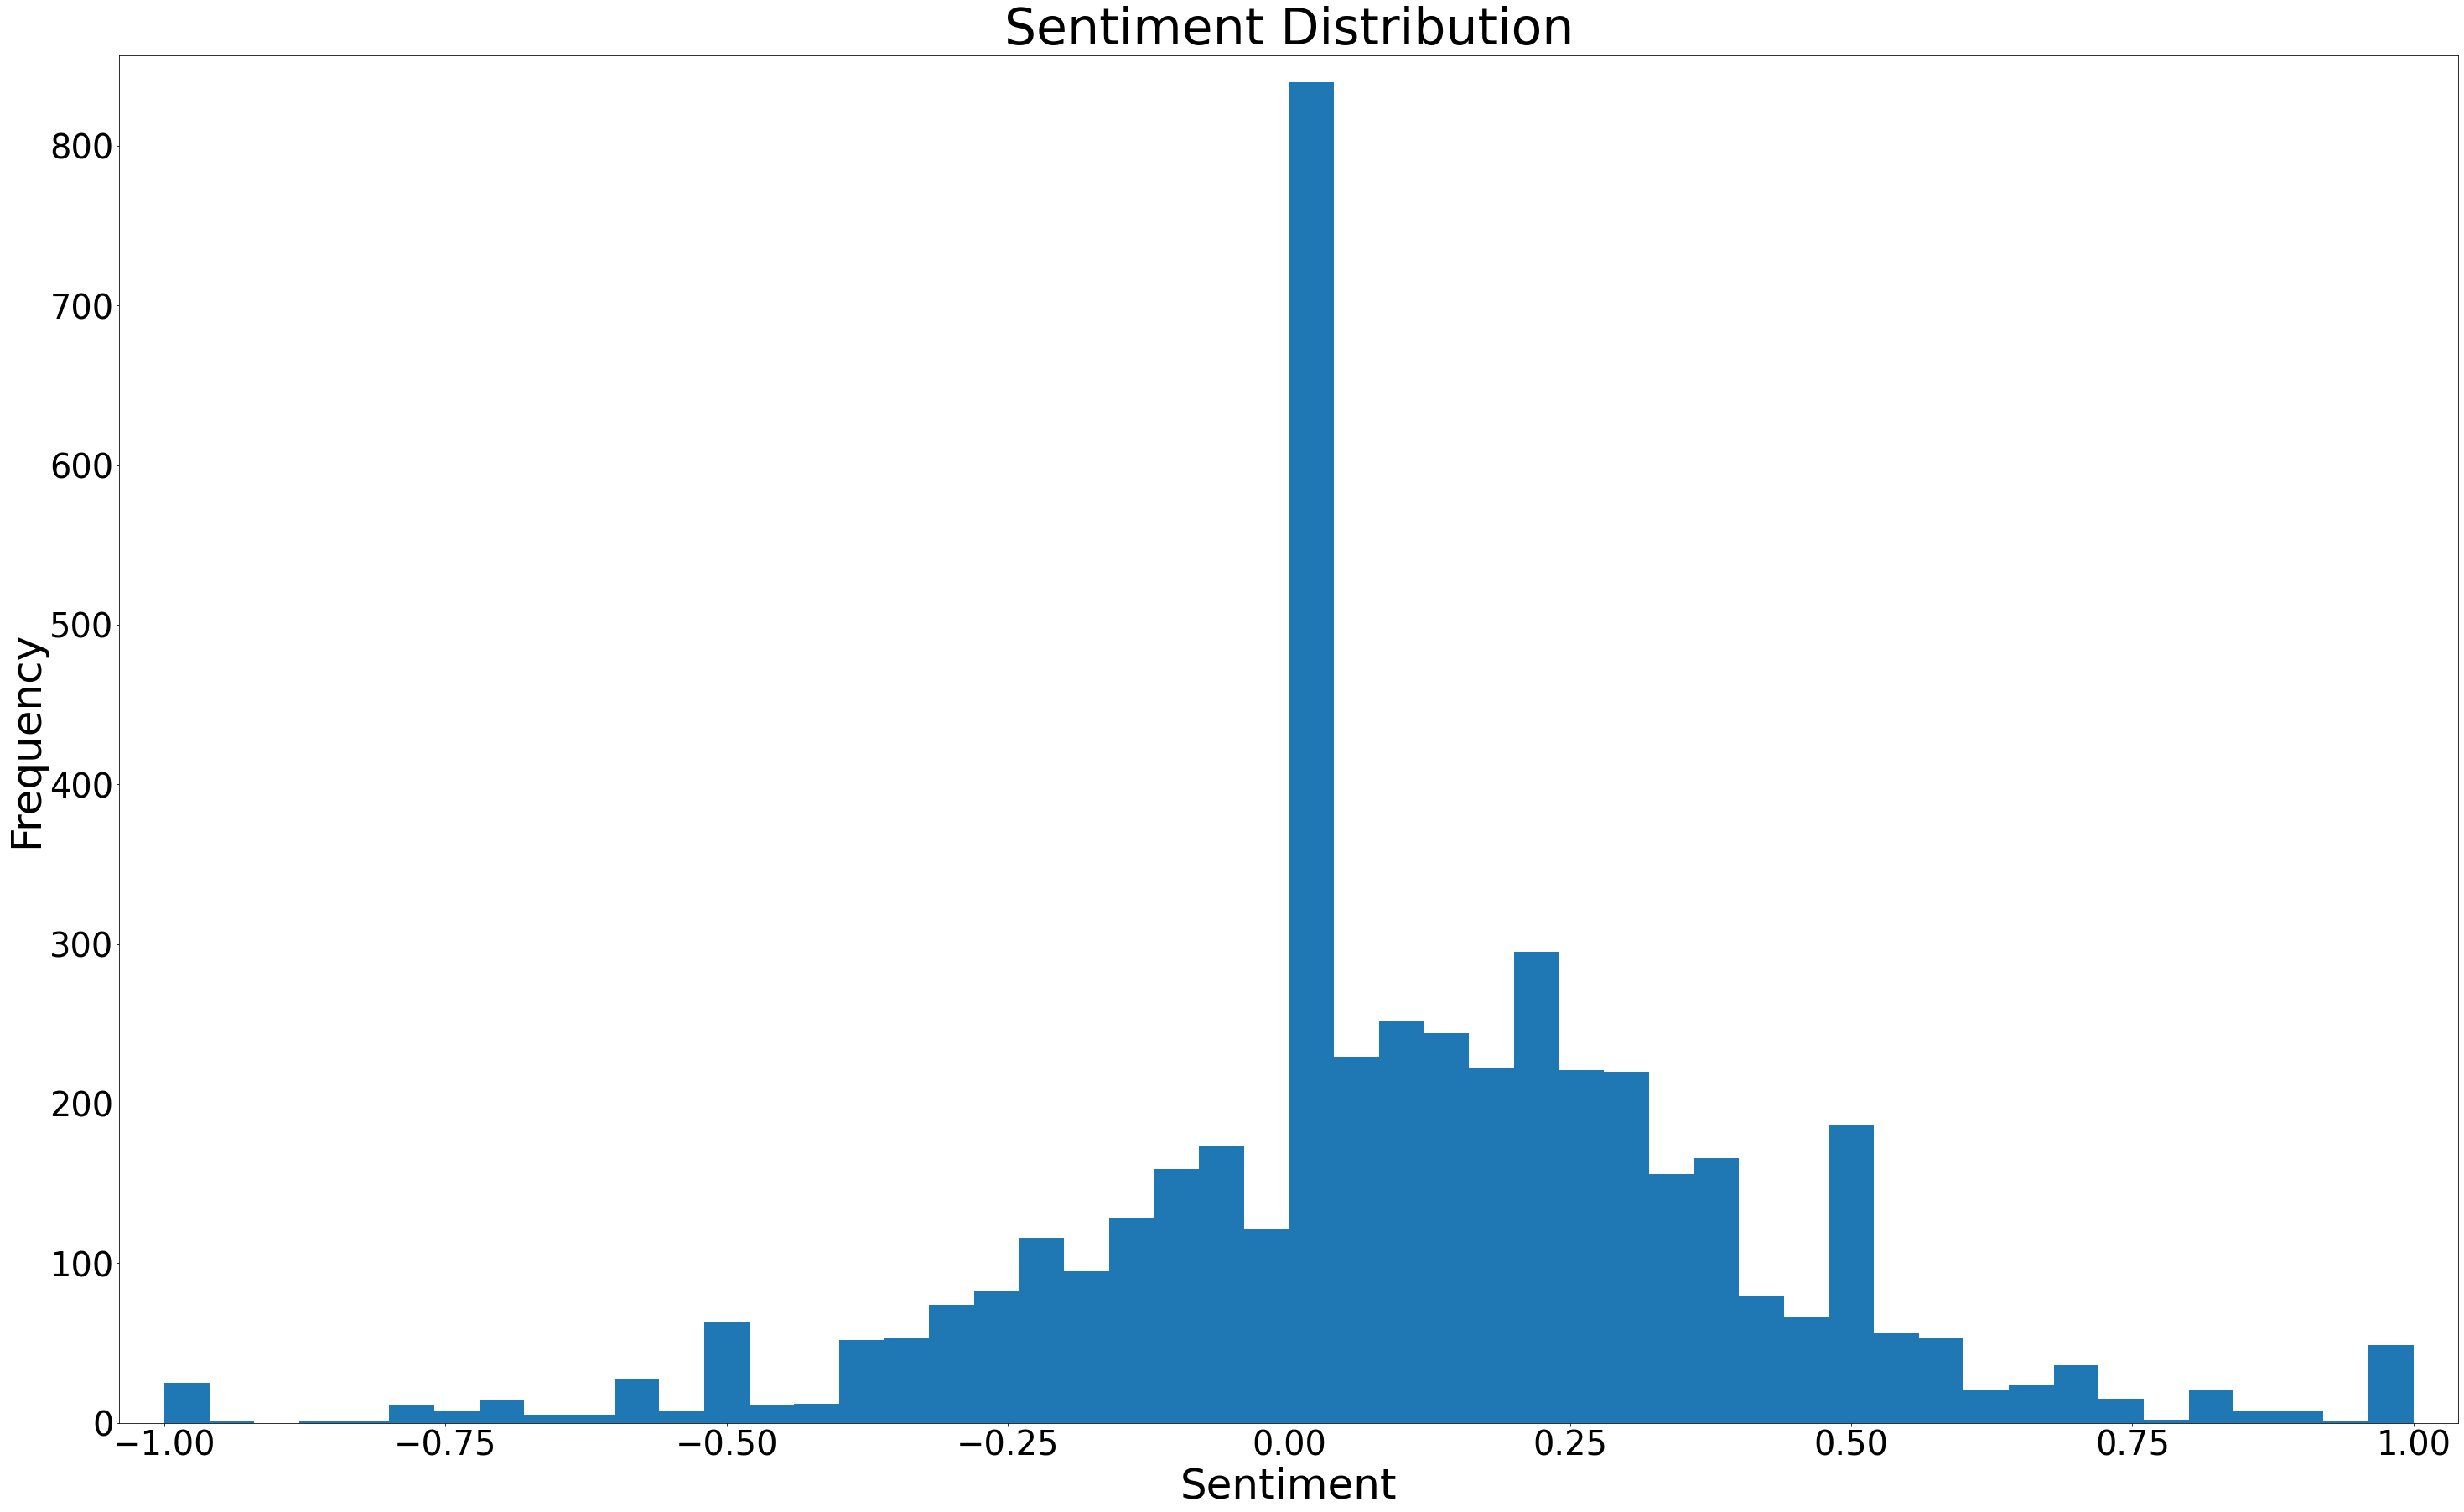

In [38]:
plt.figure(figsize=(50,30))
plt.margins(0.02)
plt.xlabel('Sentiment', fontsize=50)
plt.xticks(fontsize=40)
plt.ylabel('Frequency', fontsize=50)
plt.yticks(fontsize=40)
plt.hist(df['sentiment'], bins=50)
plt.title('Sentiment Distribution', fontsize=60)
plt.show()

In [39]:
df.review_type = df.review_type.astype('category')

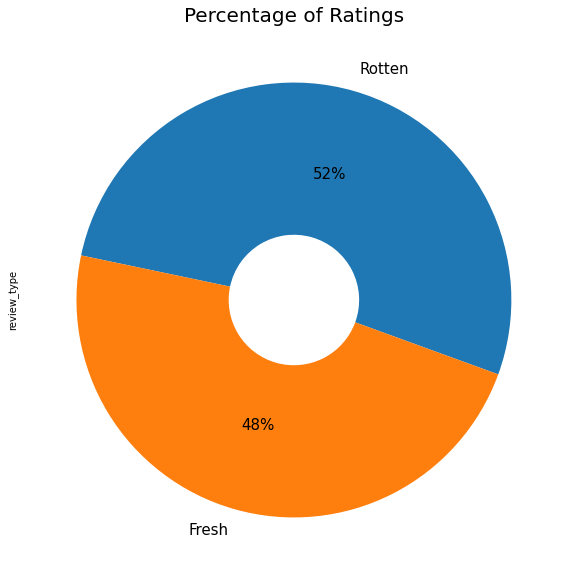

In [40]:
plt.figure(figsize=(30,10))
plt.title('Percentage of Ratings', fontsize=20)
df.review_type.value_counts().plot(kind='pie', labels=['Rotten', 'Fresh'],
                              wedgeprops=dict(width=.7), autopct='%1.0f%%', startangle= -20, 
                              textprops={'fontsize': 15})

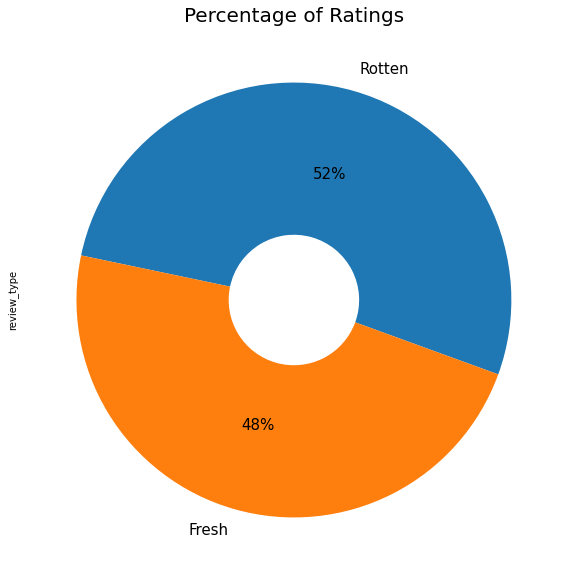

In [41]:
plt.figure(figsize=(30,10))
plt.title('Percentage of Ratings', fontsize=20)
df.review_type.value_counts().plot(kind='pie', labels=['Rotten', 'Fresh'],
                              wedgeprops=dict(width=.7), autopct='%1.0f%%', startangle= -20, 
                              textprops={'fontsize': 15})

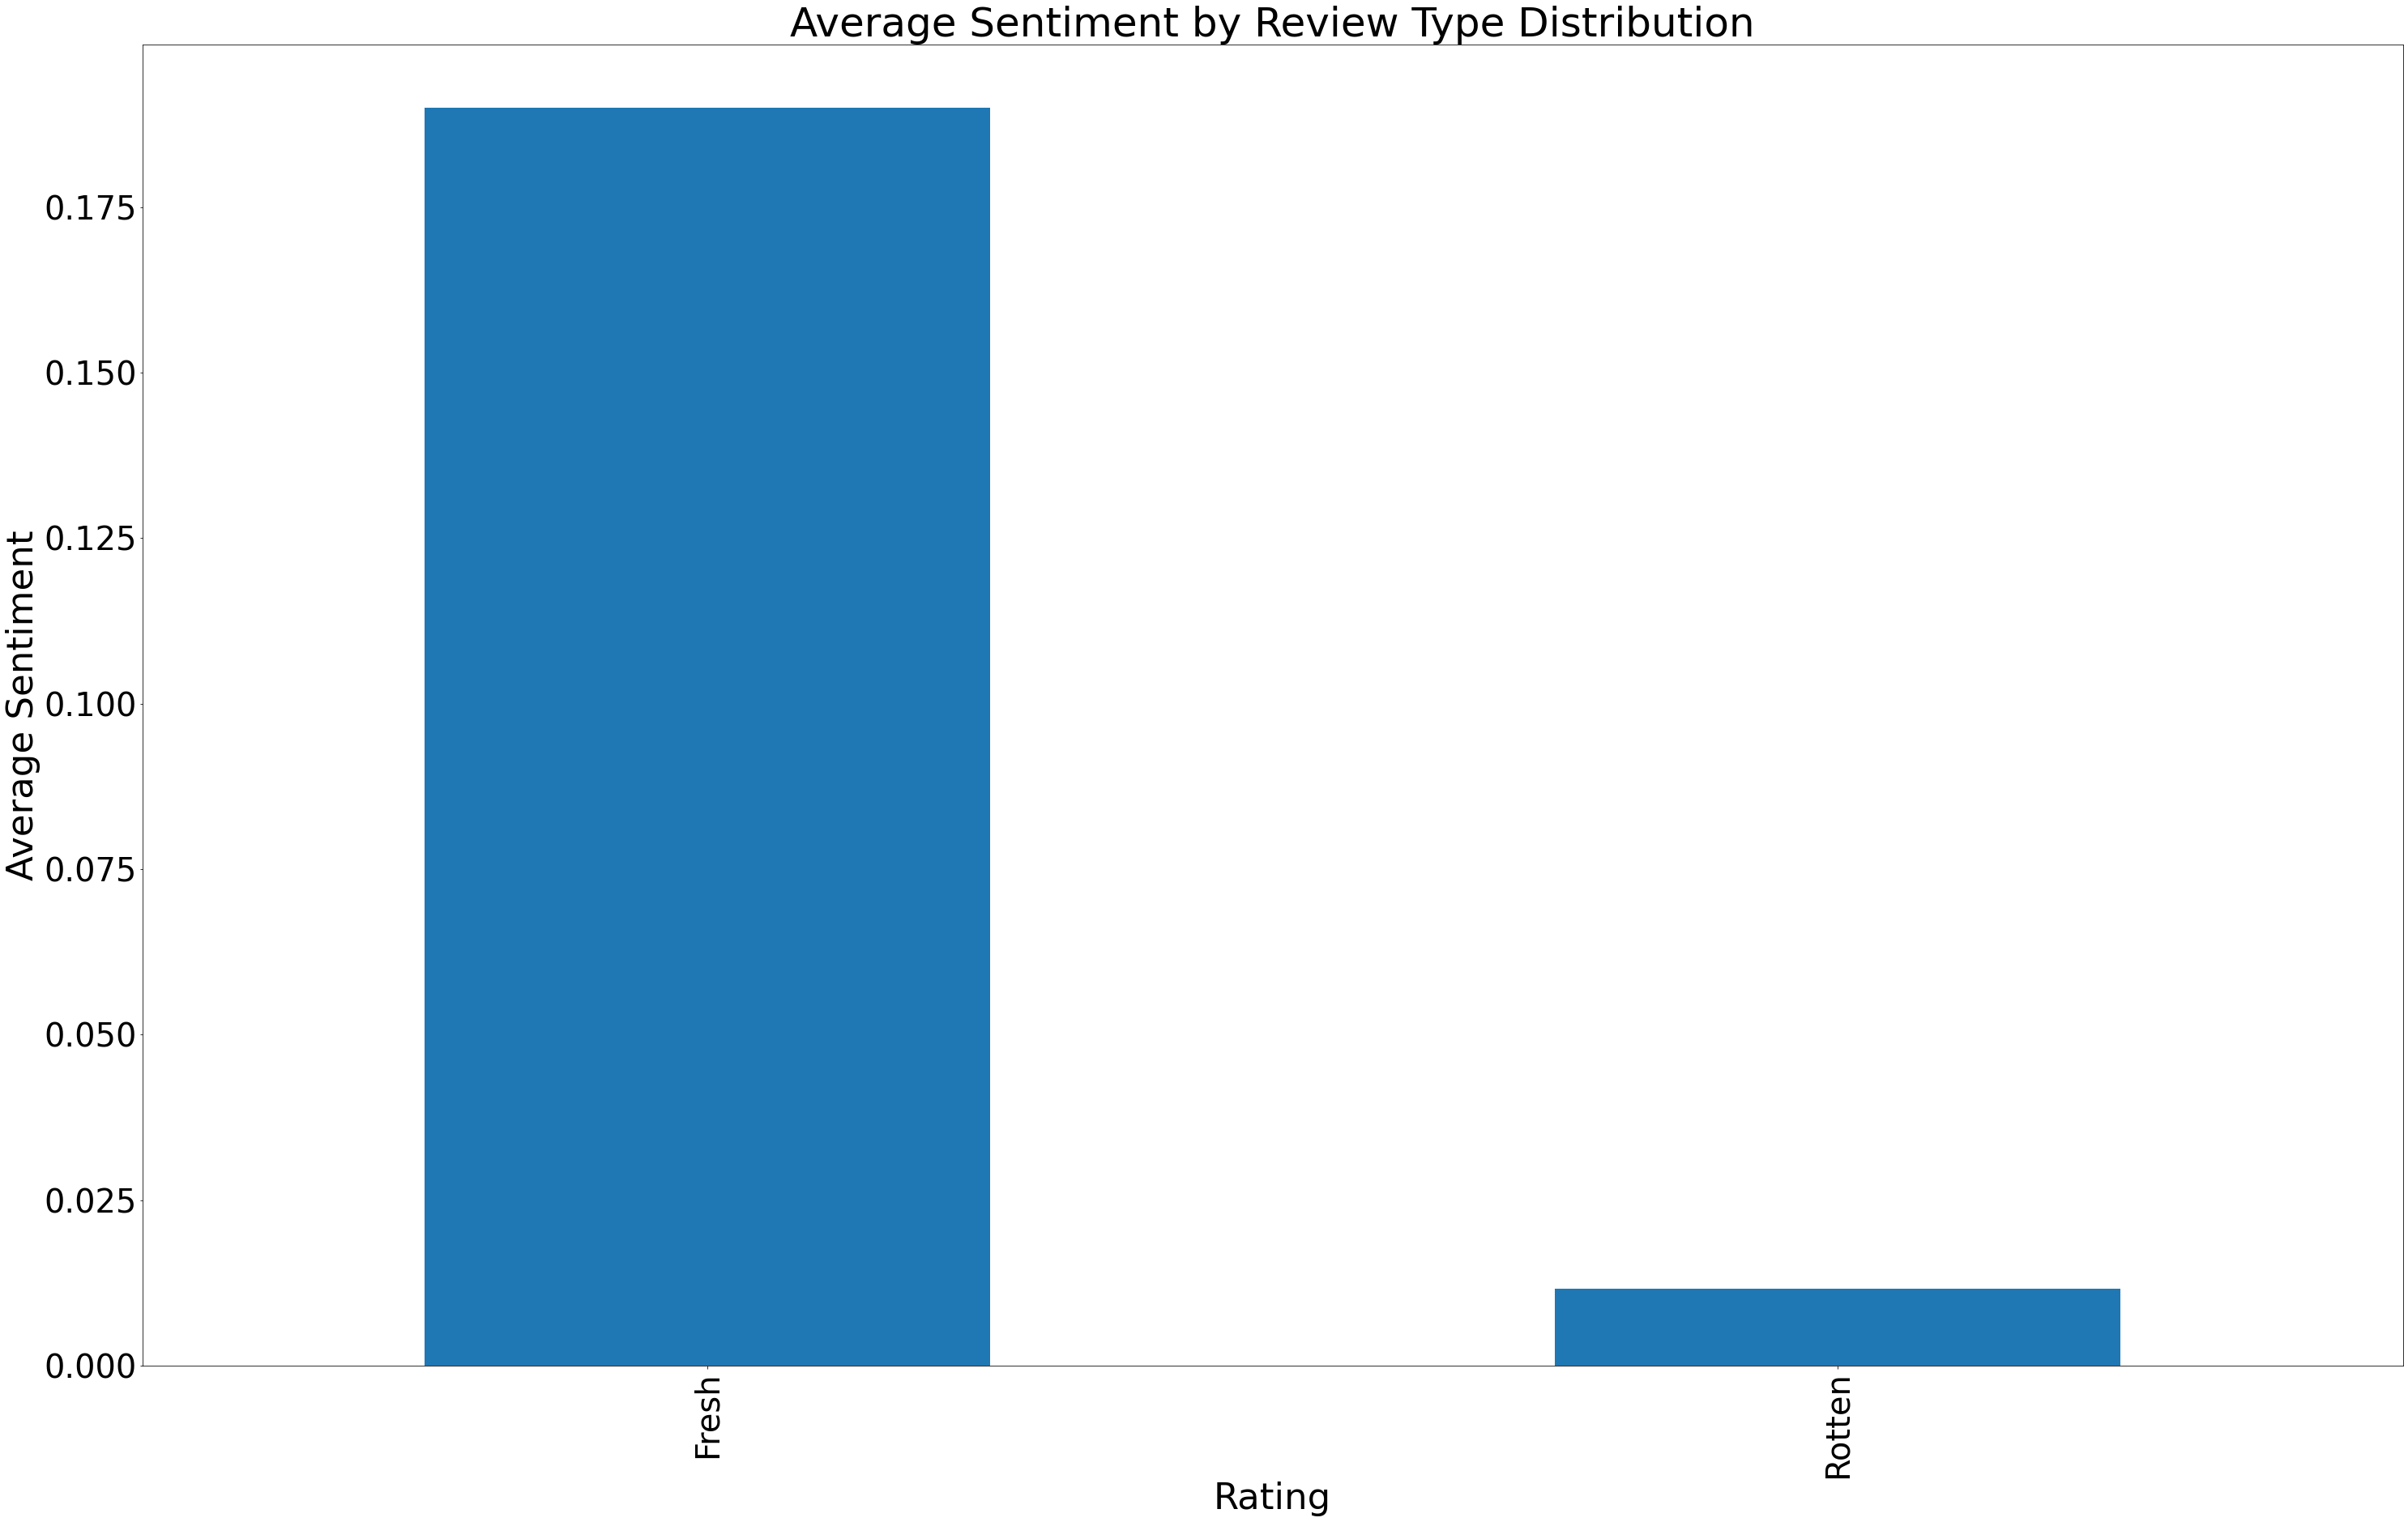

In [42]:
polarity_avg = df.groupby('review_type')['sentiment'].mean().plot(kind='bar', figsize=(50,30))
plt.xlabel('Rating', fontsize=45)
plt.ylabel('Average Sentiment', fontsize=45)
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
plt.title('Average Sentiment by Review Type Distribution', fontsize=50)
plt.show()

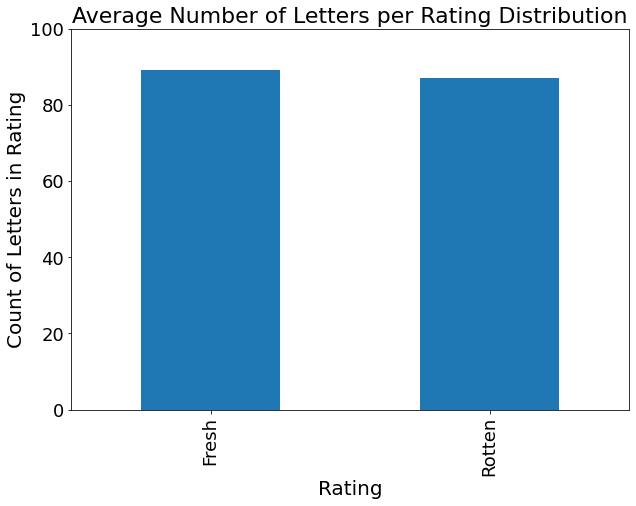

In [43]:
letter_avg = df.groupby('review_type')['review_len'].mean().plot(kind='bar', figsize=(10,7))
plt.ylim(0, 100)
plt.xlabel('Rating', fontsize=20)
plt.ylabel('Count of Letters in Rating', fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title('Average Number of Letters per Rating Distribution', fontsize=22)
plt.show()

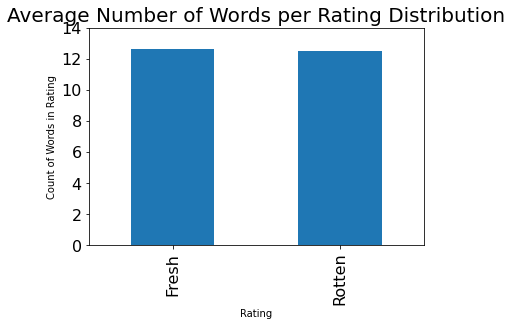

In [44]:
word_avg = df.groupby('review_type')['word_count'].mean().plot(kind='bar')
plt.ylim(0, 14)
plt.xlabel('Rating')
plt.ylabel('Count of Words in Rating')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title('Average Number of Words per Rating Distribution', fontsize=20)
plt.show()

In [45]:
words = df['lemmatized']
allwords = []
for wordlist in words:
    allwords += wordlist
print(allwords)

['fantasy', 'adventure', 'fuse', 'greek', 'mythology', 'contemporary', 'american', 'place', 'value', 'anyone', 'around', '15', 'give', 'take', 'couple', 'year', 'thrill', 'visual', 'spectacle', 'uma', 'thurman', 'medusa', 'gorgon', 'coiffure', 'writhing', 'snake', 'stone', 'inducing', 'hypnotic', 'gaze', 'one', 'highlight', 'bewitching', 'fantasy', 'top', 'notch', 'cast', 'dazzling', 'special', 'effect', 'tide', 'teen', 'next', 'harry', 'potter', 'instalment', 'whether', 'audience', 'get', 'behind', 'lightning', 'thief', 'hard', 'predict', 'overall', 'entertaining', 'introduction', 'promising', 'new', 'world', '--', 'consuming', 'shadow', 'potter', 'big', 'break', 'free', 'really', 'lacking', 'lightning', 'thief', 'genuine', 'sense', 'wonder', 'thing', 'brings', 'viewer', 'back', 'hogwarts', 'list', 'ingredient', 'movie', 'magic', 'potion', 'enjoy', 'start', 'finish', 'harry', 'potter', 'knockoff', 'come', 'transparent', 'slapdash', 'wannabe', 'franchise', 'jumpstarter', 'directed', 'c

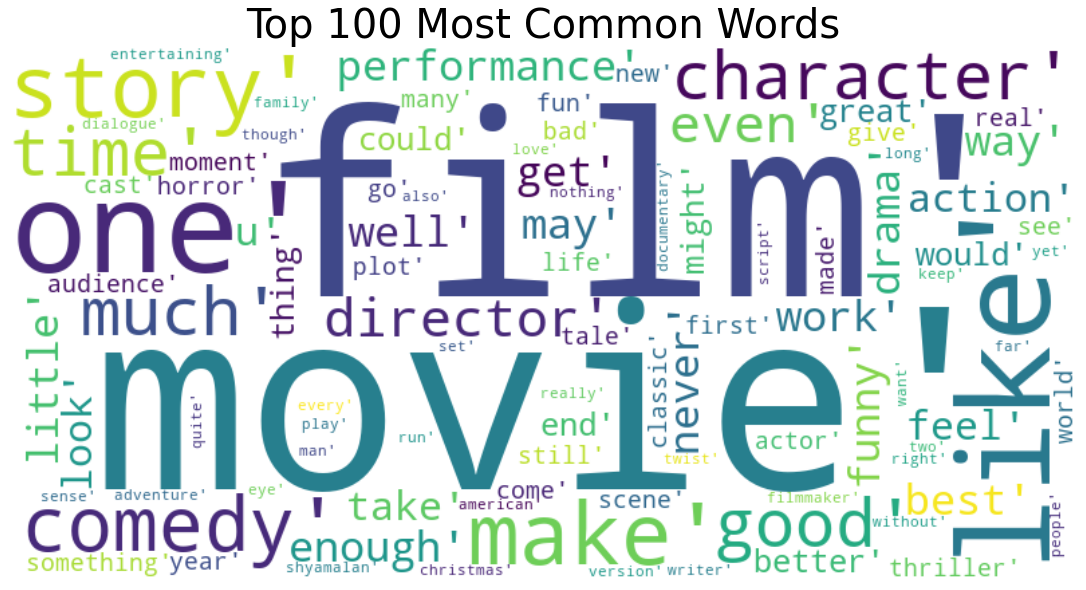

In [46]:
mostcommon = FreqDist(allwords).most_common(100)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(str(mostcommon))
fig = plt.figure(figsize=(20,8), facecolor='white')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Top 100 Most Common Words', fontsize=40)
plt.tight_layout(pad=0)
plt.show()

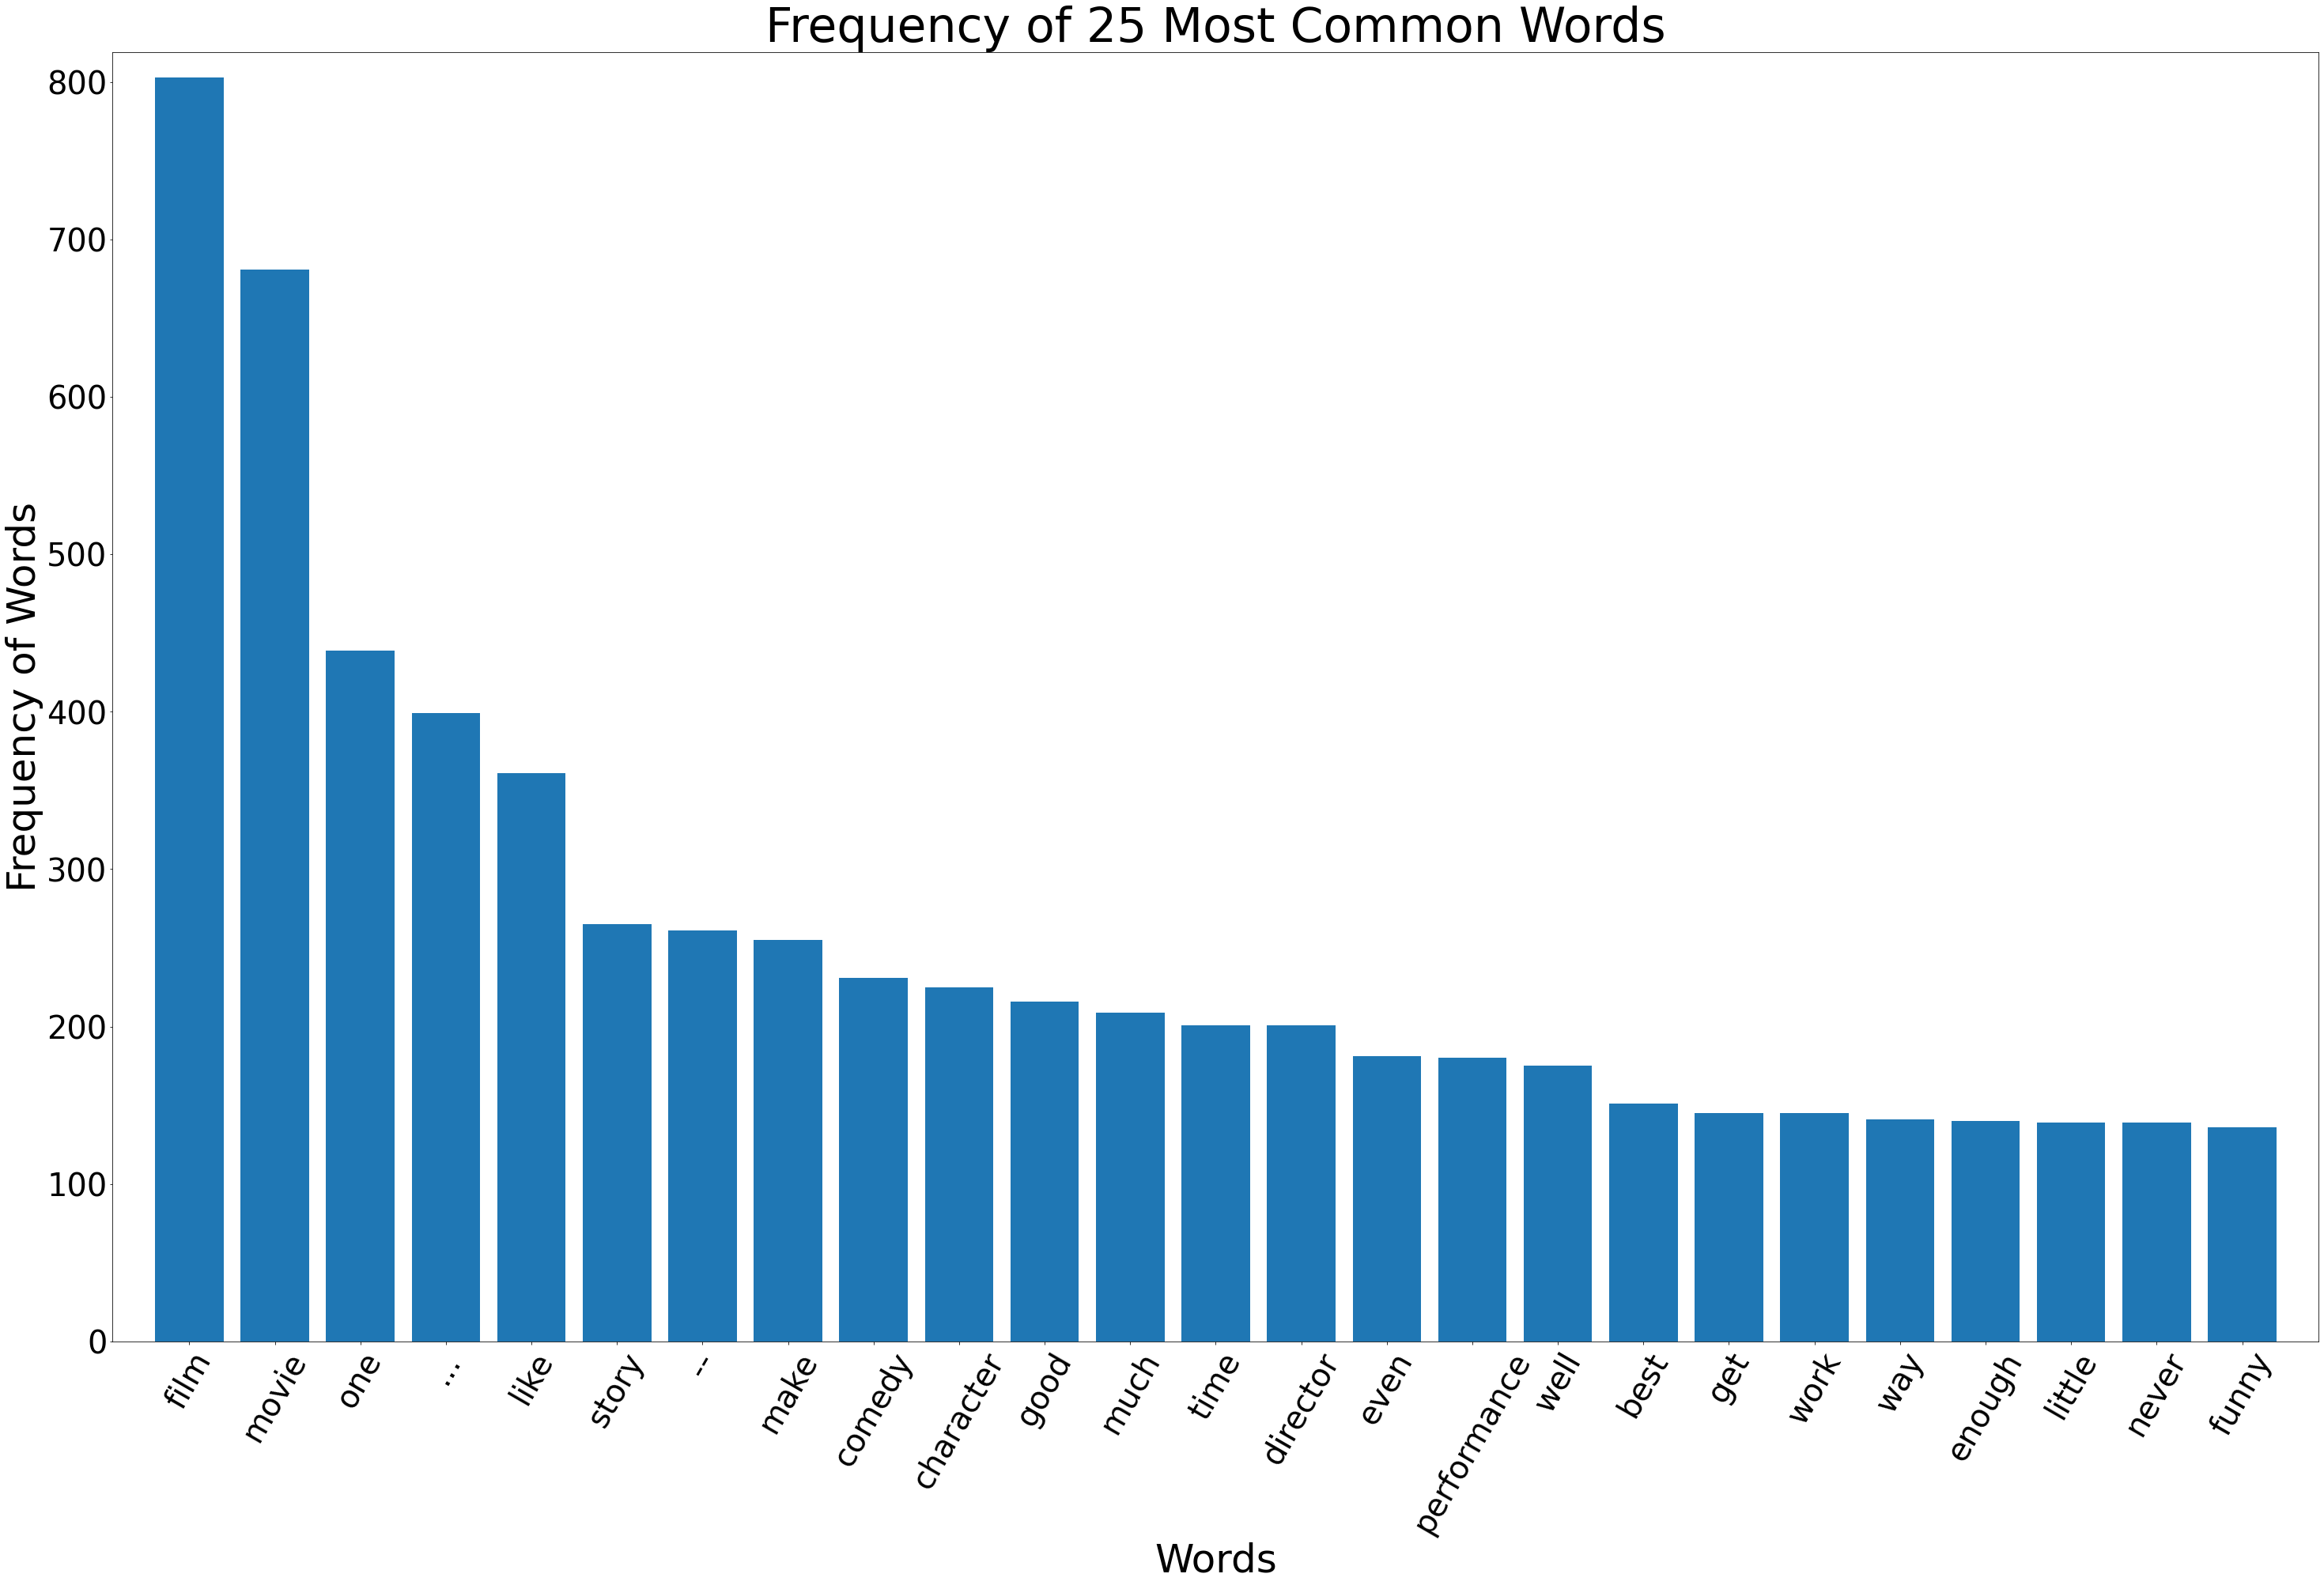

In [47]:
mostcommon_small = FreqDist(allwords).most_common(25)
x, y = zip(*mostcommon_small)
plt.figure(figsize=(50,30))
plt.margins(0.02)
plt.bar(x, y)
plt.xlabel('Words', fontsize=50)
plt.ylabel('Frequency of Words', fontsize=50)
plt.yticks(fontsize=40)
plt.xticks(rotation=60, fontsize=40)
plt.title('Frequency of 25 Most Common Words', fontsize=60)
plt.show()

In [48]:
tf_vectorizer = CountVectorizer(max_df=0.9, min_df=25, max_features=5000)
tf = tf_vectorizer.fit_transform(df['lemma_str'].values.astype('U'))
tf_feature_names = tf_vectorizer.get_feature_names()
doc_term_matrix = pd.DataFrame(tf.toarray(), columns=list(tf_feature_names))
doc_term_matrix

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,000,10,acting,action,actor,actually,adaptation,adult,adventure,age,...,worst,worth,would,writer,written,wrong,year,yet,young,zemeckis
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4715,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4716,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4717,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4718,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
class sklearn.feature_extraction.text.CountVectorizer(*
                        , input='content', encoding='utf-8', decode_error='ignore', strip_accents=None, lowercase=True
                    , preprocessor=None, tokenizer=None, stop_words=None, token_pattern='(?u)\b\w\w+\b', ngram_range=(1, 2)
                            , analyzer='word', max_df=0.9, min_df=0.9, max_features=None, vocabulary=None, binary=False
                             , dtype=<class 'numpy.int64'>)

SyntaxError: ignored

In [ ]:
vectorizer = CountVectorizer()
rt["vectors"] = vectorizer.fit_transform(rt.lemmatized)
rt

In [ ]:
vectorizer2 = CountVectorizer(analyzer='word', ngram_range=(2, 2))
X2 = vectorizer2.fit_transform(corpus)

In [ ]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

In [ ]:
# Create and generate a word cloud image:
wordcloud = WordCloud().generate(rtdf.lemmatized[:5])

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:

vectorizer = TfidfVectorizer()
vectorizer.fit_transform(rtdf['lemmatized'])

In [ ]:
from collections import Counter ###
def count_words(df, column='text', preprocess=None, min_freq=2):

    # process tokens and update counter
    def update(doc):
        tokens = doc if preprocess is None else preprocess(doc)
        counter.update(tokens)

    # create counter and run through all data
    counter = Counter()
    df[column].progress_map(update)

    # transform counter into data frame
    freq_df = pd.DataFrame.from_dict(counter, orient='index', columns=['freq'])
    freq_df = freq_df.query('freq >= @min_freq')
    freq_df.index.name = 'token'
    
    return freq_df.sort_values('freq', ascending=False)

In [ ]:
freq_df = count_words(df(df["text"]))
freq_df.head(5)

In [ ]:

transformer = TfidfTransformer(smooth_idf=False)
transformer
TfidfTransformer(smooth_idf=False)

In [ ]:
df = rt.drop(columns = ['rotten_tomatoes_link',  'tokenized', 'lower', 'no_punc', 'stopwords_removed','pos_tags', 'wordnet_pos'])
df = df.rename(columns={'review_content':'original','lemmatized' : 'text' })
df

In [ ]:
nlp = spacy.load("en_core_web_sm")

In [ ]:
import texthero as hero
from texthero import preprocessing
custom_pipeline = [preprocessing.fillna,
                   preprocessing.lowercase,
                   preprocessing.remove_whitespace,
                   preprocessing.remove_diacritics
                   
                  ]
df['clean_text'] = hero.clean(rt['review_content'], custom_pipeline)
df['clean_text'] = [n.replace('{','') for n in df['clean_text']]
df['clean_text'] = [n.replace('}','') for n in df['clean_text']]
df['clean_text'] = [n.replace('(','') for n in df['clean_text']]
df['clean_text'] = [n.replace(')','') for n in df['clean_text']]

In [ ]:
custom_pipeline = [preprocessing.fillna,
                   preprocessing.lowercase,
                   preprocessing.remove_whitespace,
                   preprocessing.remove_diacritics
                   
                  ]
df['clean_text'] = hero.clean(df['text'], custom_pipeline)
df['clean_text'] = [n.replace('{','') for n in df['clean_text']]
df['clean_text'] = [n.replace('}','') for n in df['clean_text']]
df['clean_text'] = [n.replace('(','') for n in df['clean_text']]
df['clean_text'] = [n.replace(')','') for n in df['clean_text']]

In [ ]:
df


In [ ]:
df['tfidf'] = (hero.tfidf(df['clean_text'], max_features=3000))

In [ ]:
df

In [ ]:
from nltk.collocations import *
bigram_measures = nltk.collocations.BigramAssocMeasures()

In [ ]:
finder = BigramCollocationFinder.from_words(df['text'])
scored = finder.score_ngrams(bigram_measures.raw_freq)

In [ ]:
for bscore in scored[:30]:
    print (bscore)

In [ ]:
textdist = FreqDist(tuple(df[text]))
items = textdist.most_common(30)
for item in items:
  print (item[0], '\t',  item[1])

In [ ]:
df['tsnetfidf'] = hero.tsne(df['tfidf'])

In [ ]:
#create scatter plot of tfidf
hero.scatterplot(df, col='tsnetfidf', color='convertedManaCost'
                 , title="TF-IDF", hover_data = ['name','text'])

In [ ]:
from collections import Counter

#tokens = tokenize("She likes my cats and my cats like my sofa.")

counter = Counter(df[df.text]).astype(str)
print(counter)

In [ ]:
pp.pprint(counter.most_common(5))